### Пороговая обработка

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [2]:
def threshold_processing(image, threshold):
    return np.where(image > threshold, 255, 0).astype(np.uint8)

In [3]:
filename = 'images/01_apc.tif'
with Image.open(filename) as img:
    img.load()
img_np = np.array(img)
thresh = 75
binary_img = threshold_processing(img_np, thresh)
img_proc = Image.fromarray(binary_img.astype(np.uint8), mode='L')
img_proc.save('binary.tif')

C:\Users\bucki\AppData\Local\Temp\ipykernel_19780\973783639.py:7: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img_proc = Image.fromarray(binary_img.astype(np.uint8), mode='L')


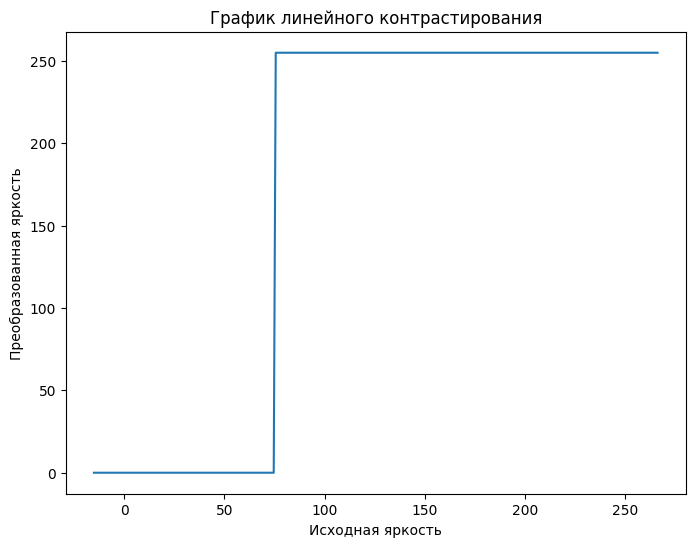

In [4]:
x = np.linspace(-15, 266, 280)
y = np.where(x < thresh, 0, 255)
plt.figure(figsize=(8,6))
plt.plot(x, y)
plt.xlabel('Исходная яркость')
plt.ylabel('Преобразованная яркость')
plt.title('График линейного контрастирования')
plt.show()

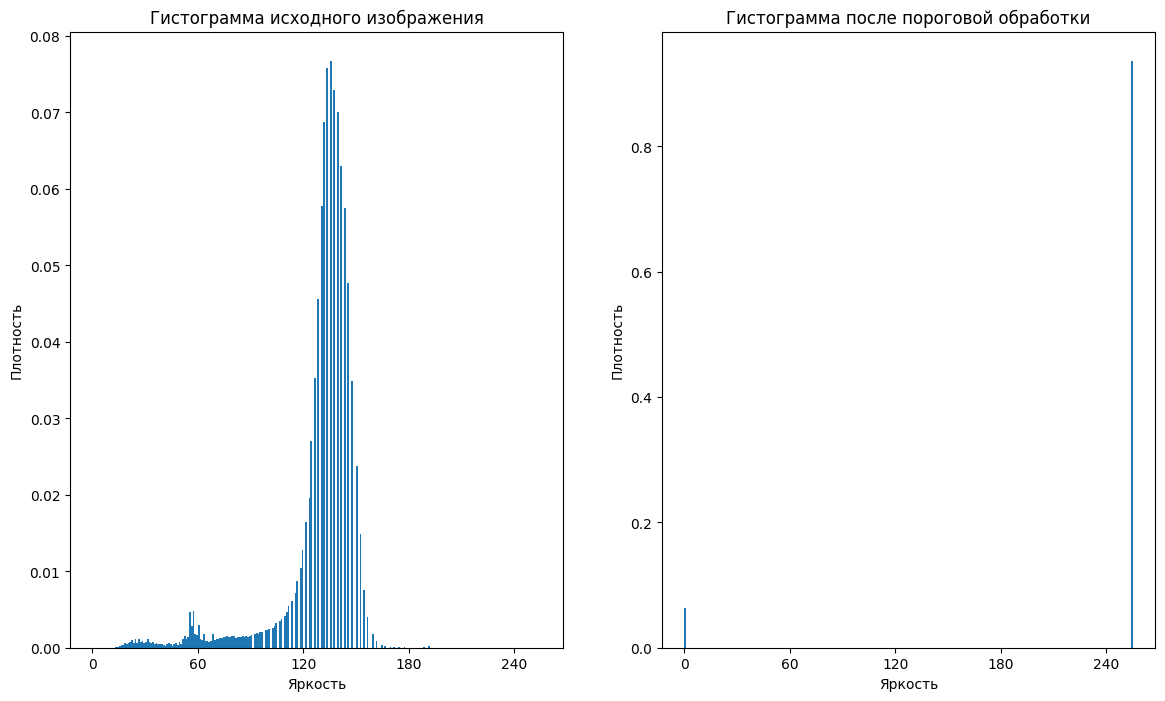

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14,8))
bins = np.arange(0, 256, 1)

f_values, f_bins, _ = axes[0].hist(img_np.flatten(), bins=bins, density=True)
g_values_binarized, g_bins_binarized, _ = axes[1].hist(binary_img.flatten(), bins=bins, density=True)
axes[0].set_title('Гистограмма исходного изображения')
axes[0].set_xlabel('Яркость')
axes[0].set_ylabel('Плотность')

axes[1].set_title('Гистограмма после пороговой обработки')
axes[1].set_xlabel('Яркость')
axes[1].set_ylabel('Плотность')
for ax in axes:
    ax.set_xticks(np.arange(0, 256, 60))

plt.show()

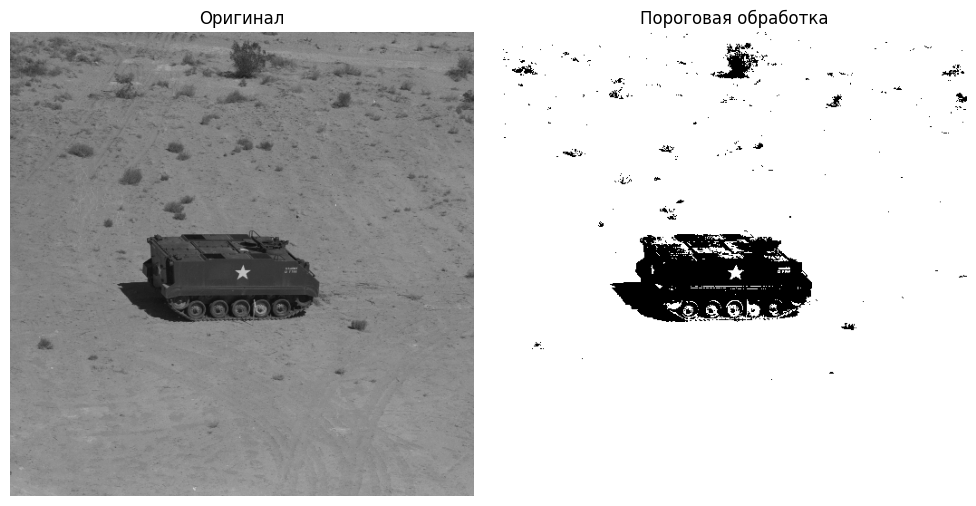

In [6]:
img1 = Image.open(filename)
img2 = Image.open('binary.tif')

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img1, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Оригинал')
axes[0].axis('off')

axes[1].imshow(img2, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Пороговая обработка')
axes[1].axis('off')

plt.tight_layout()
plt.show()
img2.close()

### Линейное контрастирование

In [7]:
def linear_contrast(image):
    f_min = np.min(image)
    f_max = np.max(image)
    g_min = 0
    g_max = 255
    a = (g_max - g_min) / (f_max - f_min)
    b = (g_min * f_max - g_max * f_min) / (f_max - f_min)
    contrasted_image = (a * image + b).astype(np.uint8)
    
    x = np.linspace(-15, 266, 280)
    y = np.where(x < g_min, a * g_min + b, np.where(x > g_max, a * g_max + b, a * x + b))
    plt.figure(figsize=(8,6))
    plt.plot(x, y, label=f'g = {a}f + {b}')
    plt.legend()
    plt.show()

    return contrasted_image

C:\Users\bucki\AppData\Local\Temp\ipykernel_19780\553587707.py:7: RuntimeWarning: overflow encountered in scalar multiply
  b = (g_min * f_max - g_max * f_min) / (f_max - f_min)
C:\Users\bucki\AppData\Local\Temp\ipykernel_19780\553587707.py:7: RuntimeWarning: overflow encountered in scalar subtract
  b = (g_min * f_max - g_max * f_min) / (f_max - f_min)


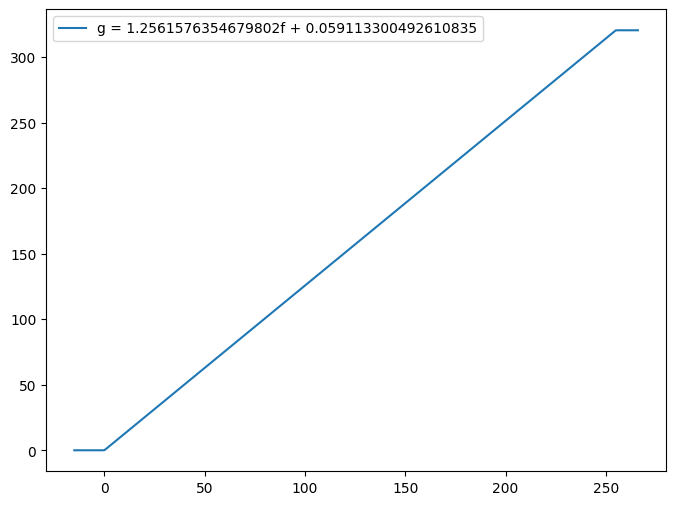

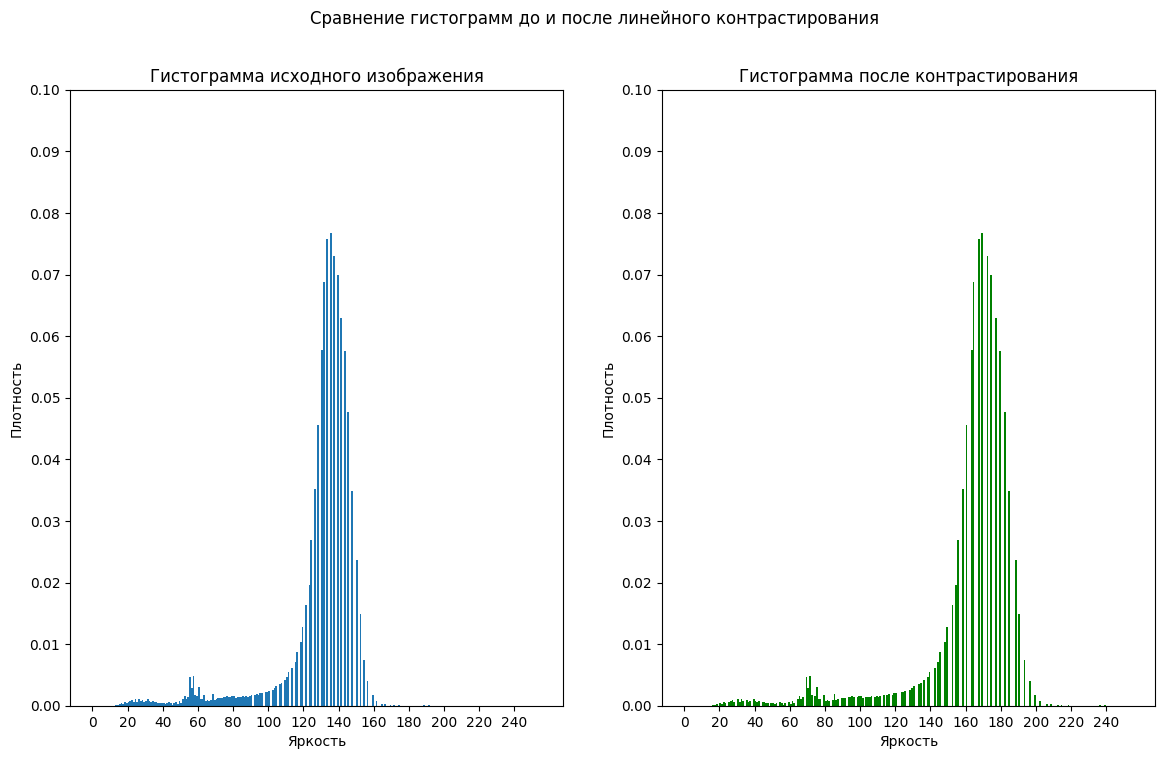

In [8]:
contrasted_img = linear_contrast(img_np)
bins = np.arange(0, 256, 1)

fig, axes = plt.subplots(1, 2, figsize=(14,8))

f_values, f_bins, _ = axes[0].hist(img_np.flatten(), bins=bins, density=True)
g_values_contrasted, g_bins_contrasted, _ = axes[1].hist(contrasted_img.flatten(), bins=bins, density=True, color='green')

axes[0].set_title('Гистограмма исходного изображения')
axes[0].set_xlabel('Яркость')
axes[0].set_ylabel('Плотность')

axes[1].set_title('Гистограмма после контрастирования')
axes[1].set_xlabel('Яркость')
axes[1].set_ylabel('Плотность')

for ax in axes:
    ax.set_yticks(np.arange(0, 0.11, 0.01))
    ax.set_xticks(np.arange(0, 256, 20))

plt.suptitle('Сравнение гистограмм до и после линейного контрастирования')
plt.show()

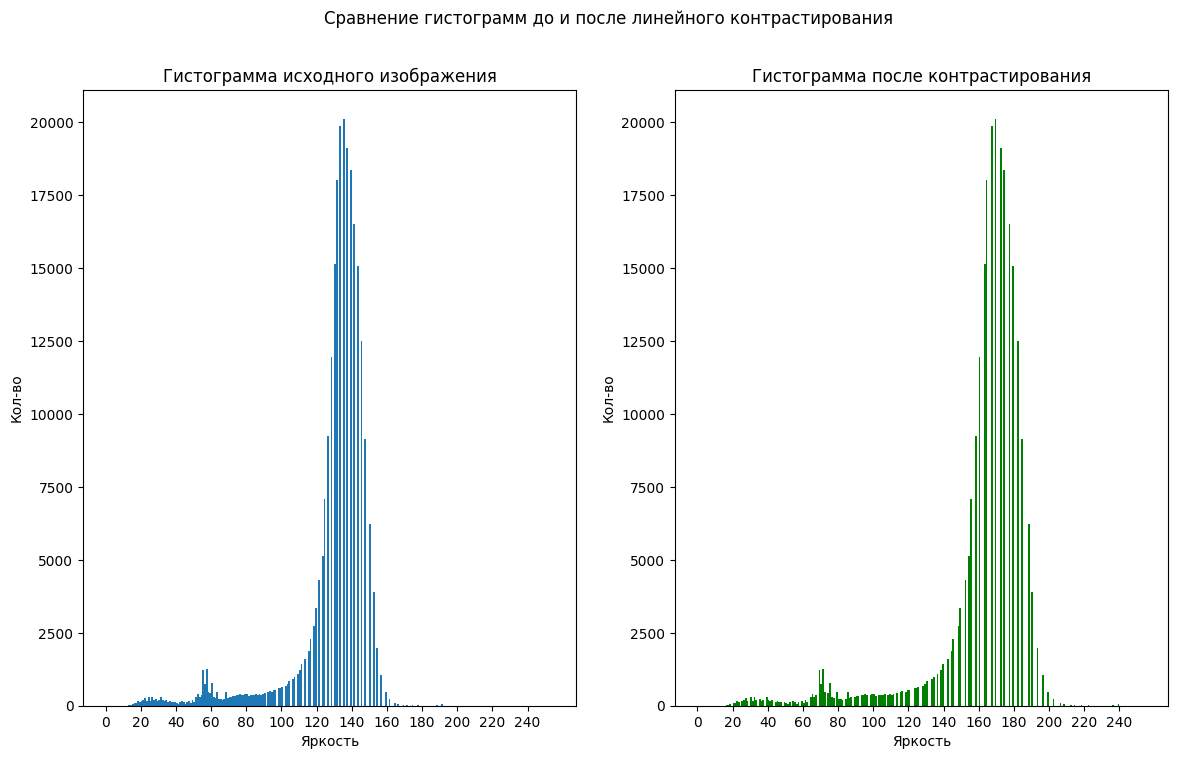

In [9]:
bins = np.arange(0, 256, 1)

fig, axes = plt.subplots(1, 2, figsize=(14,8))

f_values, f_bins, _ = axes[0].hist(img_np.flatten(), bins=bins, density=False)
g_values_contrasted, g_bins_contrasted, _ = axes[1].hist(contrasted_img.flatten(), bins=bins, density=False, color='green')

axes[0].set_title('Гистограмма исходного изображения')
axes[0].set_xlabel('Яркость')
axes[0].set_ylabel('Кол-во')

axes[1].set_title('Гистограмма после контрастирования')
axes[1].set_xlabel('Яркость')
axes[1].set_ylabel('Кол-во')

for ax in axes:
    ax.set_xticks(np.arange(0, 256, 20))

plt.suptitle('Сравнение гистограмм до и после линейного контрастирования')
plt.show()

In [10]:
img_proc = Image.fromarray(contrasted_img.astype(np.uint8), mode='L')
img_proc.save('contrasted.tif')

C:\Users\bucki\AppData\Local\Temp\ipykernel_19780\2145375765.py:1: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img_proc = Image.fromarray(contrasted_img.astype(np.uint8), mode='L')


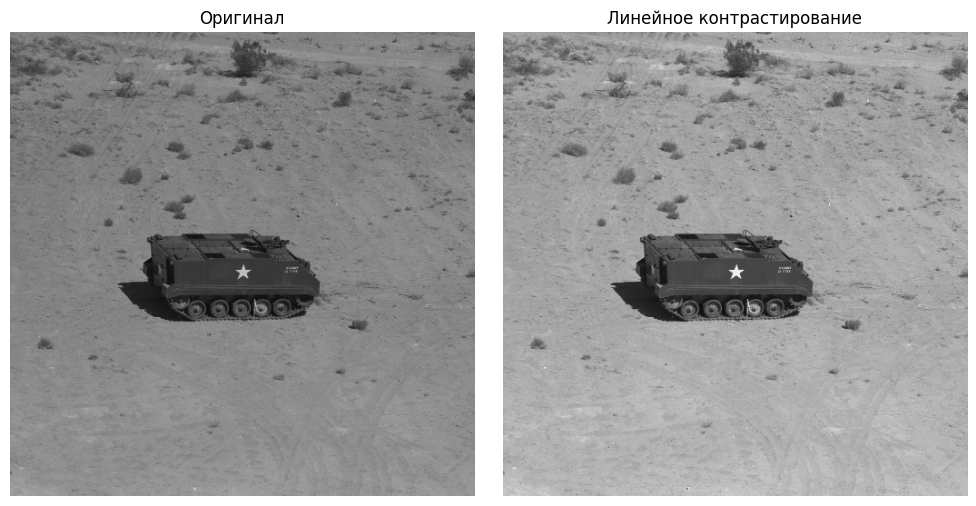

In [11]:
img1 = Image.open(filename)
img2 = Image.open('contrasted.tif')

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img1, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Оригинал')
axes[0].axis('off')

axes[1].imshow(img2, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Линейное контрастирование')
axes[1].axis('off')

plt.tight_layout()
plt.show()
img2.close()


### Эквализация

In [12]:
def equalization(image):
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0,256])
    print('Гистограмма:', hist)
    print('Границы интервалов:', bins)
    cdf = hist.cumsum()
    print('Накопленная гистограмма:', cdf)
    cdf_normalized = cdf * 255 / cdf[-1] # (255 - 0) * cdf + 0
    transform_map = np.floor(cdf_normalized).astype(np.uint8)
    result = transform_map[image]
    
    print('Трансформационная функция (отображение яркостей):', transform_map)
    print('image', image)
    print('result', result)

    # arr = np.array([10, 20, 30, 40])
    # indices = np.array([3, 0, 1])
    # arr[indices] = [40, 10, 20]

    # arr = np.array([4,5,6,7])
    # image = np.array([[0,2],[1,3]])
    # arr[image] = [[4,6],[5,7]]

    x = np.arange(256)
    y = transform_map
    plt.figure(figsize=(8,6))
    plt.plot(x, y, color='blue')
    plt.xlabel('Исходная яркость')
    plt.ylabel('Эквализированная яркость')
    plt.title('График поэлементного преобразования (эквализация)')
    plt.grid(True)
    plt.show()
    return result

Гистограмма: [    0     0     0     0     0     0     0     0     0     0     0     0
     4    20    23    64   100    94   170   126   174   212   252   176
   283   157   284   181   247   172   202   293   182   172   184   144
   156   117   112   113   107    70   118   146   123    52   131   160
    78   193   117   304   412   306   360  1223   735  1269   457   426
   783   289   278   472   222   234   203   235   485   262   291   308
   335   336   367   381   408   379   381   408   415   342   367   363
   367   404   363   397   382   410   442     0   470   493   474   522
   552     0   594   603   645     0   666   734   830     0   918   969
     0  1087  1231  1441     0  1603     0  1868  2276     0  2722  3346
     0  4298     0  5146  7073     0  9226     0 11948     0 15135 18026
     0 19848     0 20102     0 19118     0 18342     0 16494     0 15081
     0 12492     0  9134     0     0  6222     0  3908     0  1966     0
  1060     0     0   462     0   214  

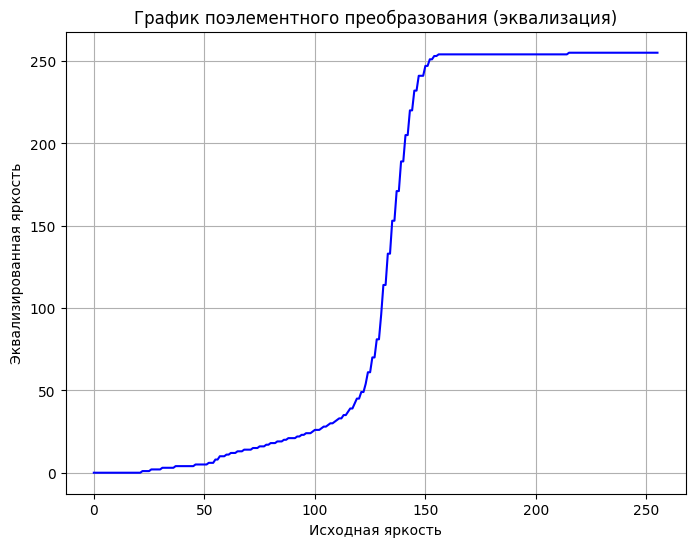

In [13]:
equalization_img = equalization(img_np)

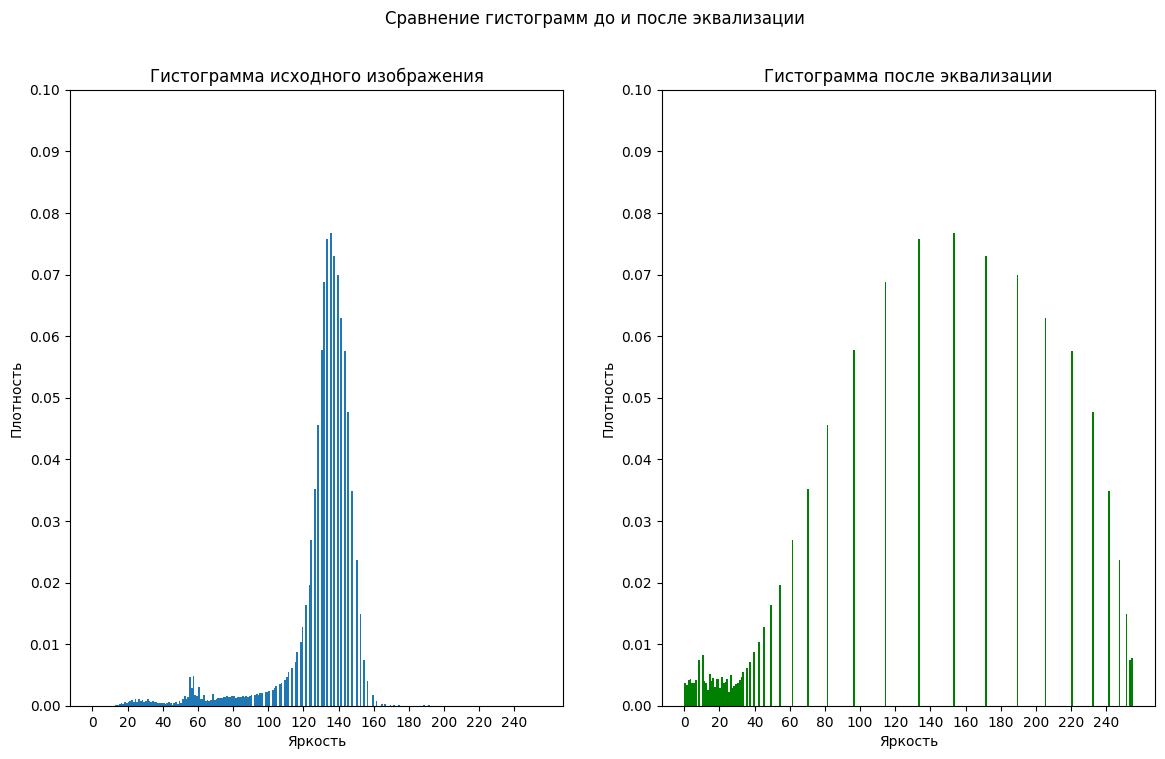

In [14]:
bins = np.arange(0, 256, 1)

fig, axes = plt.subplots(1, 2, figsize=(14,8))

f_values, f_bins, _ = axes[0].hist(img_np.flatten(), bins=bins, density=True)
g_values, g_bins, _ = axes[1].hist(equalization_img.flatten(), bins=bins, density=True, color='green')

axes[0].set_title('Гистограмма исходного изображения')
axes[0].set_xlabel('Яркость')
axes[0].set_ylabel('Плотность')

axes[1].set_title('Гистограмма после эквализации')
axes[1].set_xlabel('Яркость')
axes[1].set_ylabel('Плотность')

for ax in axes:
    ax.set_yticks(np.arange(0, 0.11, 0.01))
    ax.set_xticks(np.arange(0, 256, 20))

plt.suptitle('Сравнение гистограмм до и после эквализации')
plt.show()


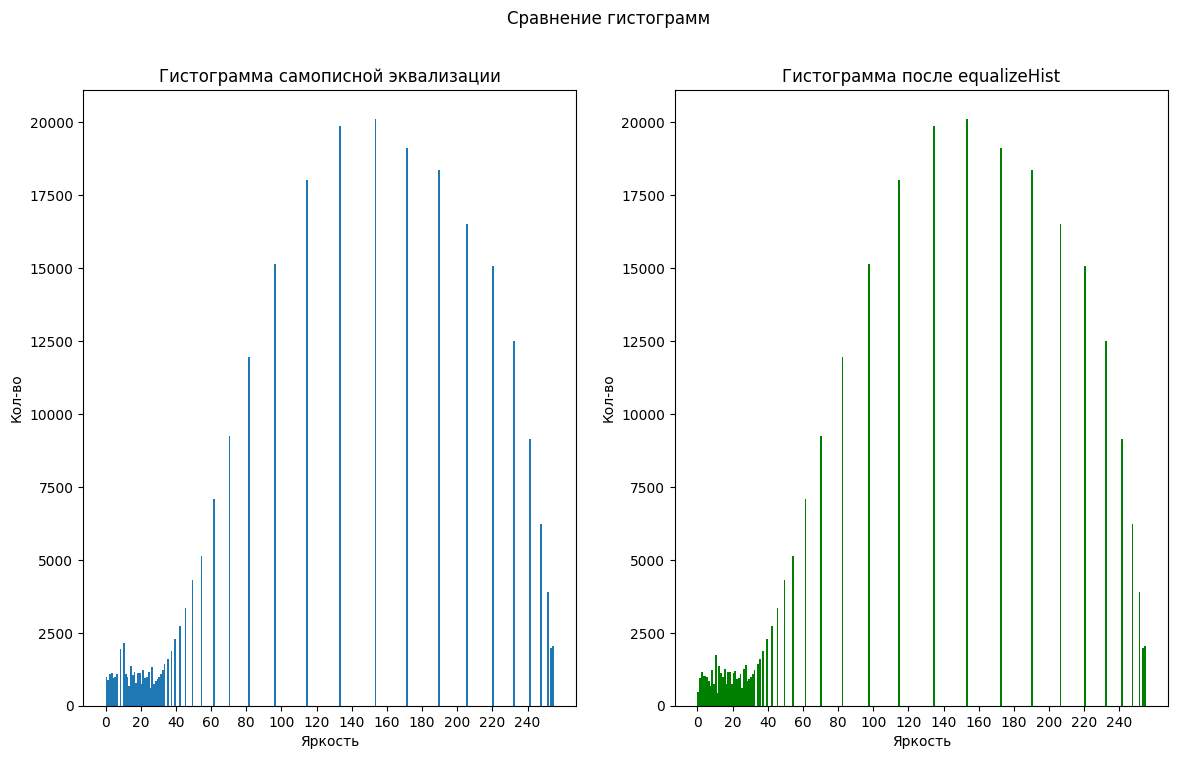

In [15]:

img_eq_cv = cv2.equalizeHist(img_np)

bins = np.arange(0, 256, 1)
fig, axes = plt.subplots(1, 2, figsize=(14,8))

f_values, f_bins, _ = axes[0].hist(equalization_img.flatten(), bins=bins, density=False)
g_values, g_bins, _ = axes[1].hist(img_eq_cv.flatten(), bins=bins, color='green', density=False)

axes[0].set_title('Гистограмма самописной эквализации')
axes[0].set_xlabel('Яркость')
axes[0].set_ylabel('Кол-во')

axes[1].set_title('Гистограмма после equalizeHist')
axes[1].set_xlabel('Яркость')
axes[1].set_ylabel('Кол-во')

for ax in axes:
    ax.set_xticks(np.arange(0, 256, 20))

plt.suptitle('Сравнение гистограмм')
plt.show()

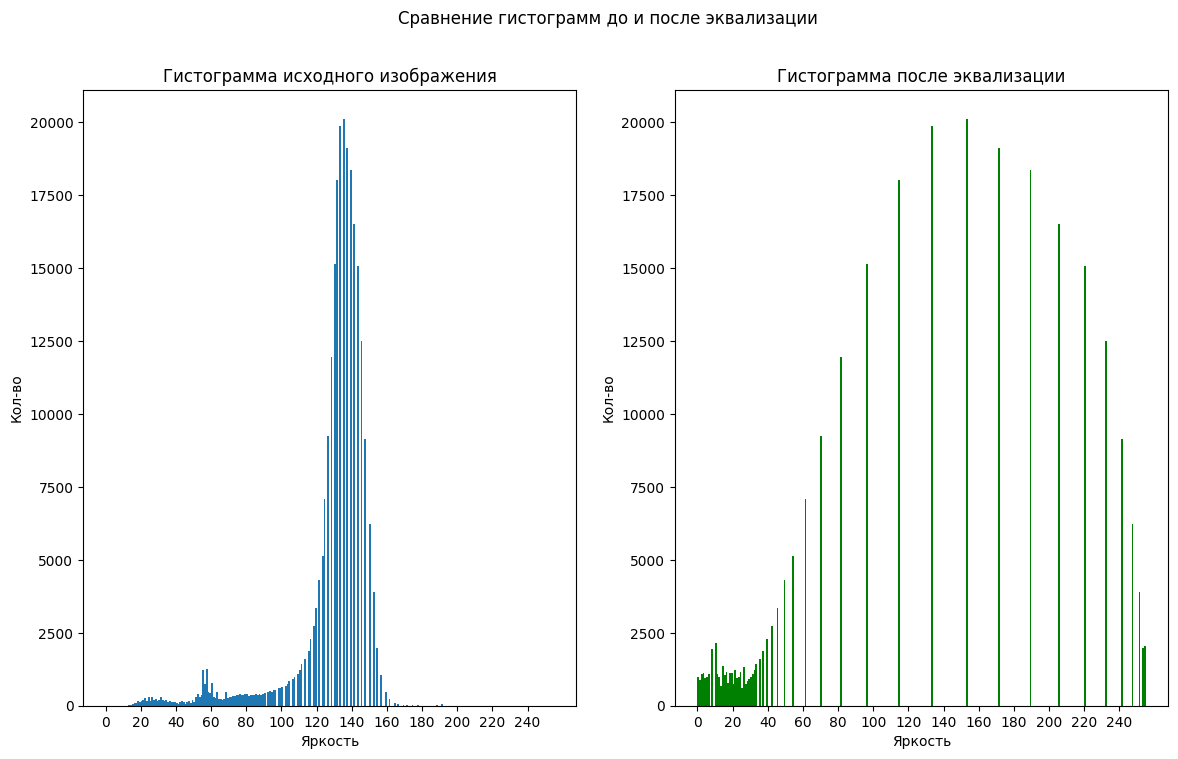

In [16]:
bins = np.arange(0, 256, 1)

fig, axes = plt.subplots(1, 2, figsize=(14,8))

f_values, f_bins, _ = axes[0].hist(img_np.flatten(), bins=bins, density=False)
g_values, g_bins, _ = axes[1].hist(equalization_img.flatten(), bins=bins, density=False, color='green')

axes[0].set_title('Гистограмма исходного изображения')
axes[0].set_xlabel('Яркость')
axes[0].set_ylabel('Кол-во')

axes[1].set_title('Гистограмма после эквализации')
axes[1].set_xlabel('Яркость')
axes[1].set_ylabel('Кол-во')

for ax in axes:
    ax.set_xticks(np.arange(0, 256, 20))

plt.suptitle('Сравнение гистограмм до и после эквализации')
plt.show()


262144


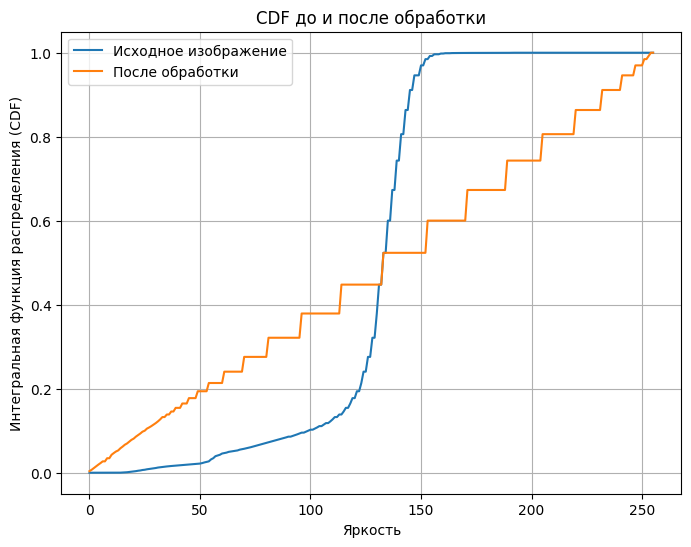

In [ ]:
hist_orig, bins = np.histogram(img_np.flatten(), bins=256, range=[0,256])
cdf_orig = hist_orig.cumsum()
cdf_orig_normalized = cdf_orig / cdf_orig[-1]

hist_proc, _ = np.histogram(equalization_img.flatten(), bins=256, range=[0,256])
cdf_proc = hist_proc.cumsum()
cdf_proc_normalized = cdf_proc / cdf_proc[-1]

plt.figure(figsize=(8,6))
plt.plot(bins[:-1], cdf_orig_normalized, label='Исходное изображение')
plt.plot(bins[:-1], cdf_proc_normalized, label='После обработки')
plt.xlabel('Яркость')
plt.ylabel('Интегральная функция распределения (CDF)')
plt.title('CDF до и после обработки')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
img_proc = Image.fromarray(img_eq_cv.astype(np.uint8), mode='L')
img_proc.save('equalized_cv.tif')

C:\Users\bucki\AppData\Local\Temp\ipykernel_19780\2542778430.py:1: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img_proc = Image.fromarray(img_eq_cv.astype(np.uint8), mode='L')


In [19]:
img_proc = Image.fromarray(equalization_img.astype(np.uint8), mode='L')
img_proc.save('equalization.tif')

C:\Users\bucki\AppData\Local\Temp\ipykernel_19780\153655117.py:1: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img_proc = Image.fromarray(equalization_img.astype(np.uint8), mode='L')


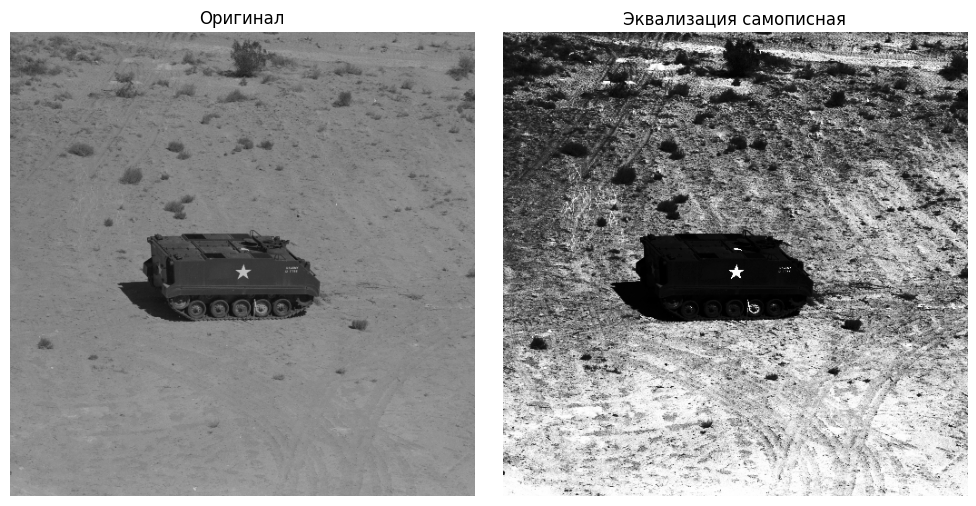

In [20]:
img1 = Image.open(filename)
img2 = Image.open('equalization.tif')

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img1, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Оригинал')
axes[0].axis('off')

axes[1].imshow(img2, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Эквализация самописная')
axes[1].axis('off')

plt.tight_layout()
plt.show()
img2.close()

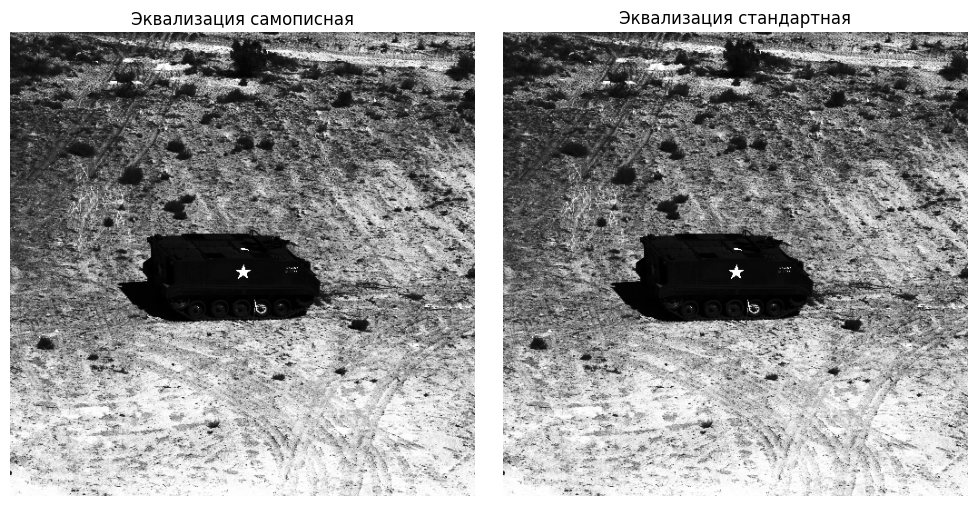

In [21]:
img1 = Image.open('equalization.tif')
img2 = Image.open('equalized_cv.tif')

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img1, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Эквализация самописная')
axes[0].axis('off')

axes[1].imshow(img2, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Эквализация стандартная')
axes[1].axis('off')

plt.tight_layout()
plt.show()
img2.close()